# 6.5 Unsupervised Machine Learning_Clustering

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to call them specifically.
%matplotlib inline

# Importing Data

In [3]:
# Turn folder into path
path = r'C:\Users\davib\Documents\Final Achievement'

In [4]:
# Import transformed data as os
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','transformed_data.csv'),index_col = False)

# Data Wrangling

In [5]:
df

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


In [6]:
# Remove column 'CODE' 
df.drop('CODE', axis = 1, inplace = True)

In [7]:
df

,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,Afghanistan,2019-12-31,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,Afghanistan,2020-01-01,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2,Afghanistan,2020-01-02,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
3,Afghanistan,2020-01-03,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
4,Afghanistan,2020-01-04,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...,...,...
50413,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


In [8]:
# Removing all categorical variables
df.drop(['COUNTRY', 'DATE'], axis = 1, inplace = True)

In [9]:
df

,HDI,TC,TD,STI,POP,GDPCAP
0,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
3,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
4,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...
50413,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


In [10]:
# Check for missing values
df.isnull().sum()

HDI       6202
TC           0
TD           0
STI          0
POP          0
GDPCAP       0
dtype: int64

In [12]:
# Create subset containing missing values
df_nan = df[df['HDI'].isnull() == True]

In [13]:
# View missing values subset
df_nan

,HDI,TC,TD,STI,POP,GDPCAP


In [14]:
df.dropna(inplace = True)

In [16]:
df.dropna(subset =['HDI'], inplace = True)

# The Elbow Technique

In [18]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [19]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 
score

C:\Users\davib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\davib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\davib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\davib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\davib\anaconda3\lib\site-packages\sklearn\clust

[-1432091.3195006992,
 -714511.5873964615,
 -519062.50930778356,
 -443329.78957087116,
 -376870.50928320567,
 -327749.06002290687,
 -283737.5187495663,
 -257335.6975477155,
 -236544.6370293461]

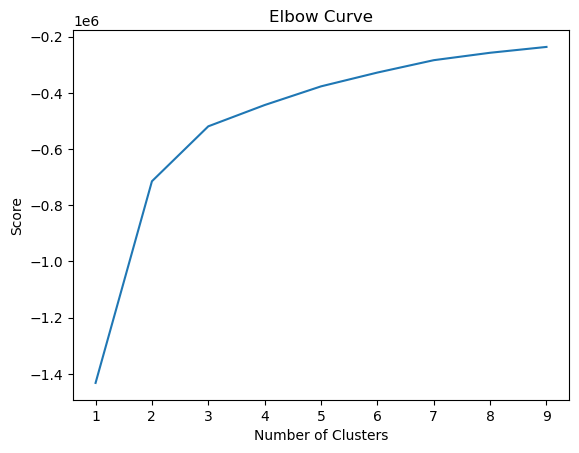

In [20]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

4a: Based on the elbow, the optimal number of clusters is 3. After value of 3 on the x-axis the curve flattens out.

# K-means Clustering

In [21]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3,) 

In [22]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\davib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs
df['clusters'] = kmeans.fit_predict(df)

C:\Users\davib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
df.head()

,HDI,TC,TD,STI,POP,GDPCAP,clusters
0,0.498,0.0,0.0,0.0,17.477233,7.497754,2
1,0.498,0.0,0.0,0.0,17.477233,7.497754,2
2,0.498,0.0,0.0,0.0,17.477233,7.497754,2
3,0.498,0.0,0.0,0.0,17.477233,7.497754,2
4,0.498,0.0,0.0,0.0,17.477233,7.497754,2


In [25]:
df['clusters'].value_counts()

1    18328
2    13664
0    12224
Name: clusters, dtype: int64

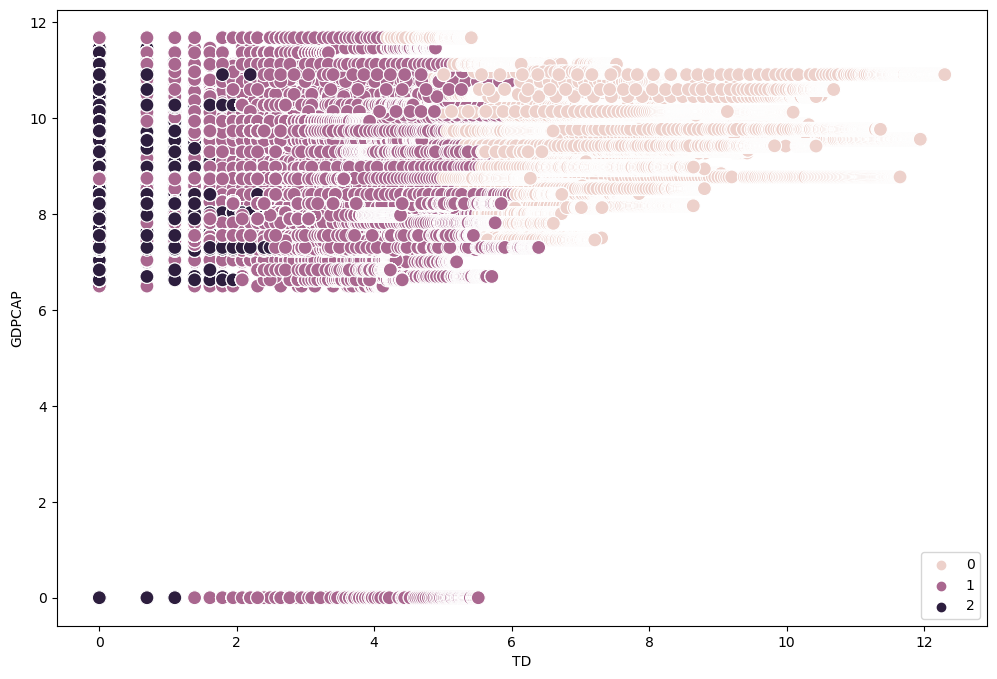

In [28]:
# Plot the clusters for the "TD" and "GDPCAP" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['TD'], y = df['GDPCAP'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('TD')
plt.ylabel('GDPCAP')
plt.show()

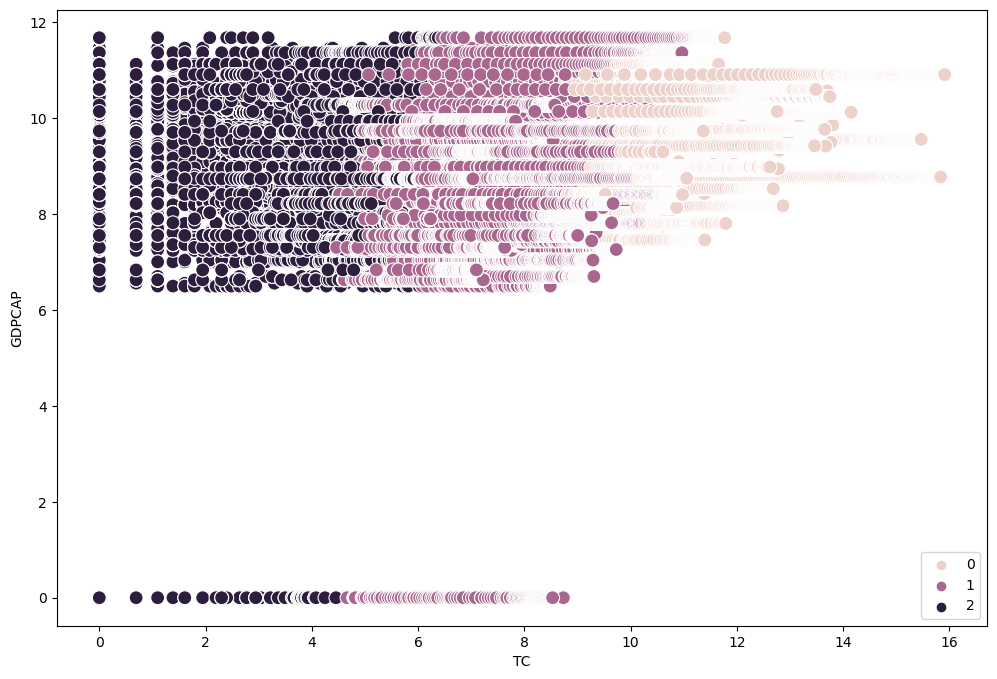

In [29]:
# Plot the clusters for the "TC" and "GDPCAP" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['TC'], y = df['GDPCAP'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('TC')
plt.ylabel('GDPCAP')
plt.show()

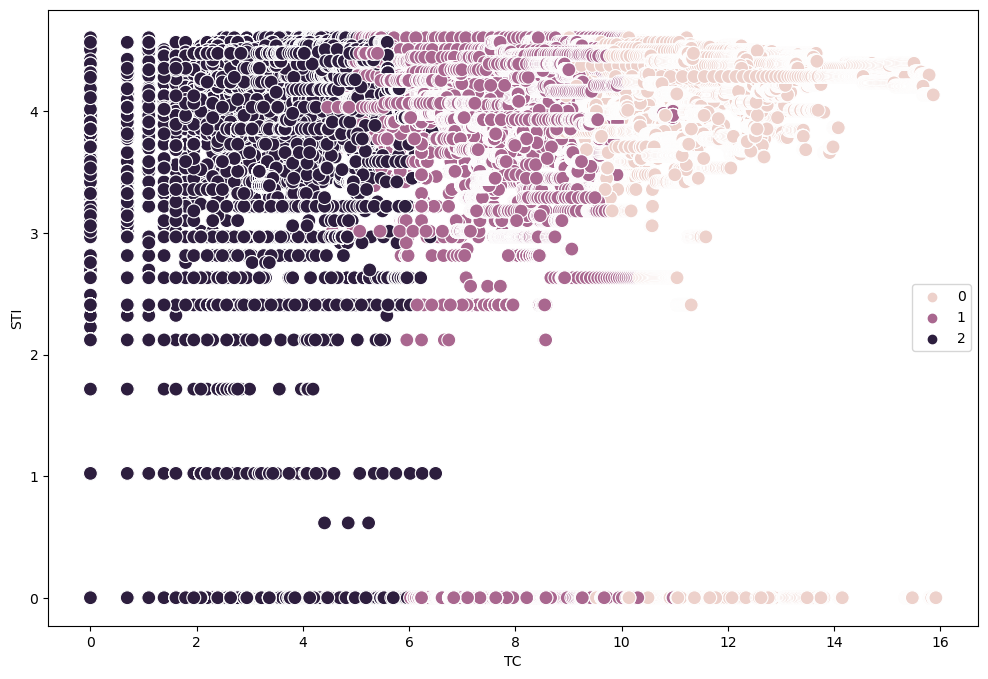

In [30]:
# Plot the clusters for the "TC" and "STI" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['TC'], y = df['STI'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('TC')
plt.ylabel('STI')
plt.show()

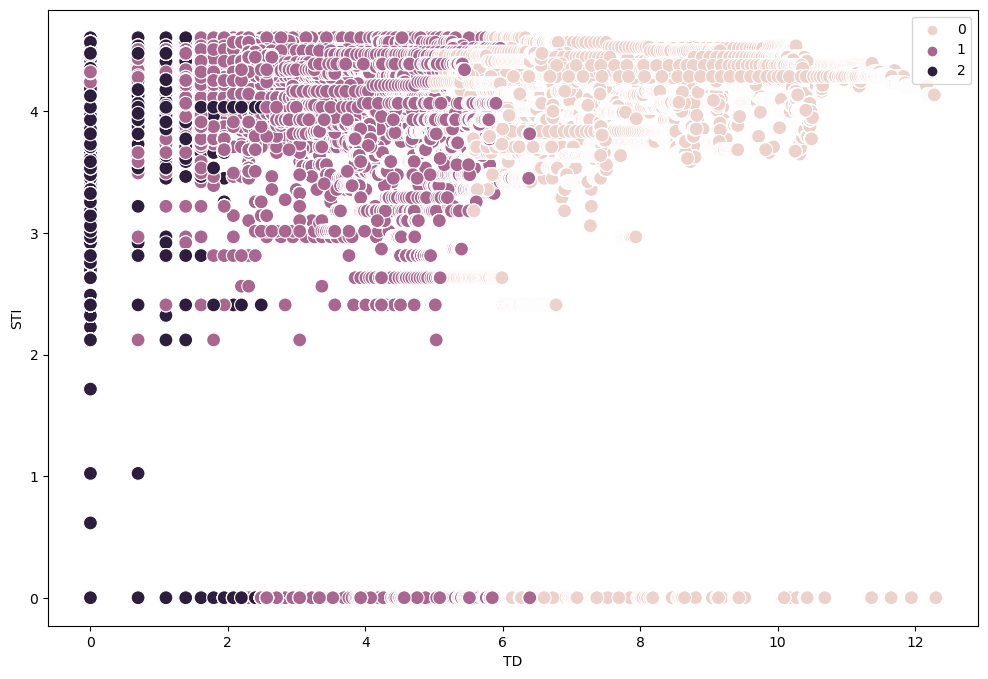

In [31]:
# Plot the clusters for the "TD" and "STI" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['TD'], y = df['STI'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('TD')
plt.ylabel('STI')
plt.show()

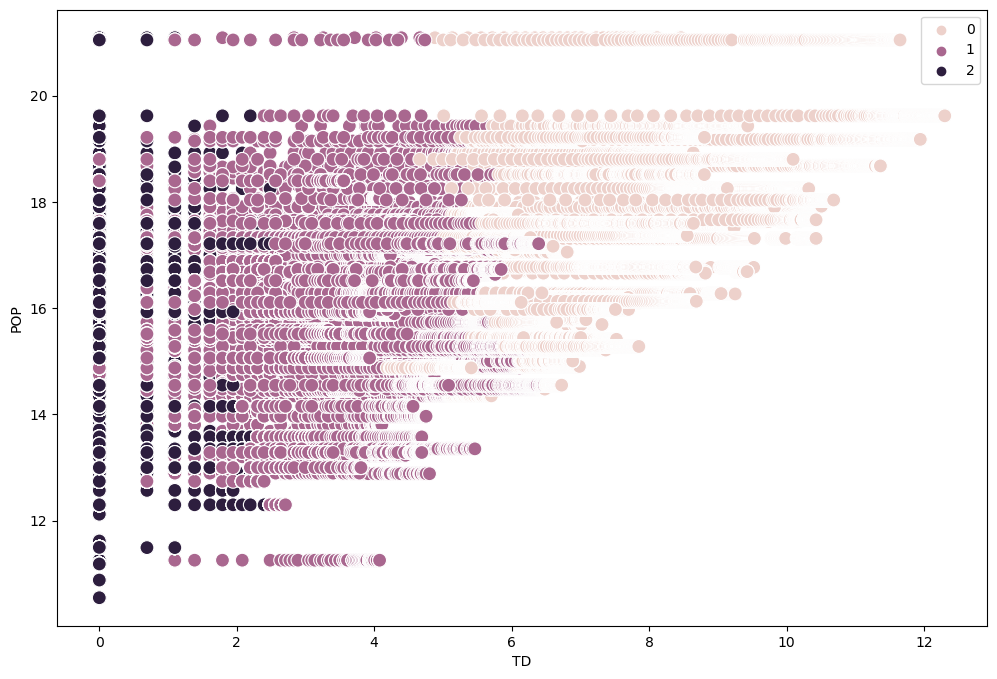

In [32]:
# Plot the clusters for the "TD" and "POP" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['TD'], y = df['POP'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('TD')
plt.ylabel('POP')
plt.show()

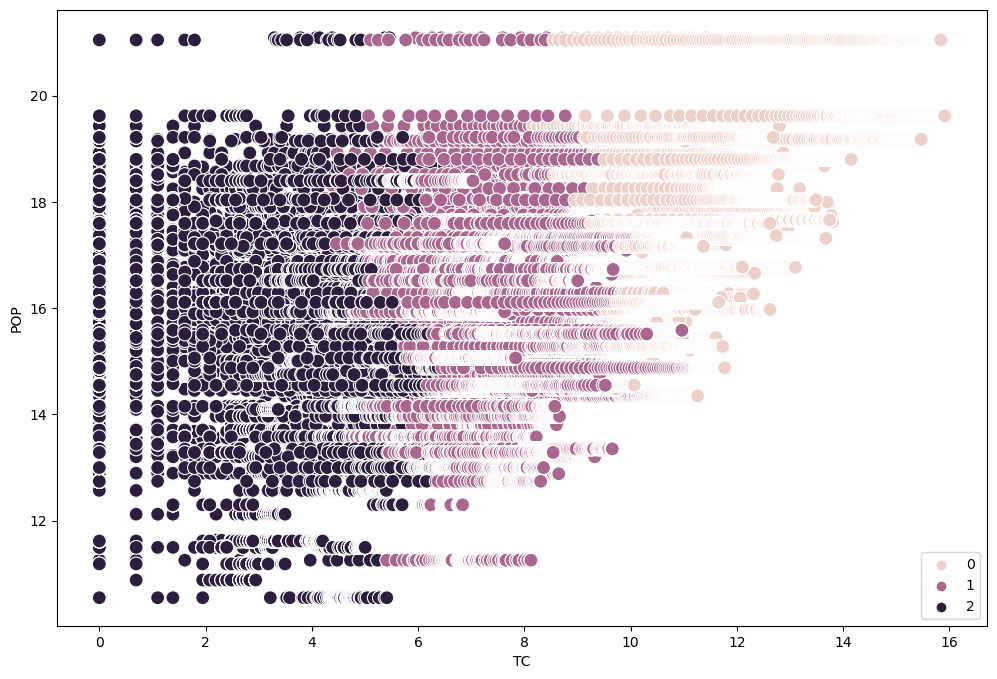

In [33]:
# Plot the clusters for the "TC" and "POP" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['TC'], y = df['POP'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('TC')
plt.ylabel('POP')
plt.show()

8: The plot 'GDPCAP vs TD' has divided clusters quite well showing that with higher 'TD', the' GDPCAP' decreases. The plot 'GDPCAP vs TC' shows that the higher 'TC', the "GDPCAP' increases.

The plot 'TC vs STI' shows that with lower 'TC', the 'STI' increases. The plot 'TD vs STI' shows that with higher 'TD', the 'STI' decreases. 

The plot 'TC vs POP' shows that with lower 'TC', the 'POP' increases. The plot 'TD vs POP' shows that with higher 'TD', the 'STI' decreases.

# Descriptive Statistics

In [34]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [35]:
df.groupby('cluster').agg({'GDPCAP':['mean', 'median'], 
                         'STI':['mean', 'median'], 
                          'POP':['mean', 'median']})

GDPCAP                 STI                  POP           
                 mean    median      mean    median       mean     median
cluster                                                                  
dark purple  9.095769  9.379310  2.441656  2.967333  15.262681  15.512894
pink         9.818306  9.856533  3.932607  4.220390  17.288516  17.424008
purple       8.754682  9.085572  3.692859  4.127779  15.734943  15.742862

10: The k-means clustering model has showed some interesting insights. However, it would be great to include the categorical variables in the analysis. It would maybe provide a different view on what in fact influences the GDPCAP variable or the STI variable.